## REGRESSÃO COM REDE NEURAL - TENSOR FLOW

O objetivo é estimar o preço das casas utilizando a base de dados house_prices junto com o framework TensorFlow.

### Informações do sistema e importação de bibliotecas

In [90]:
#Versaão do Keras
!pip list | grep keras

keras                   2.6.0


In [91]:
#Versão do TensorFlow
!pip list | grep tensorflow

tensorflow              2.6.2
tensorflow-estimator    2.6.0


In [92]:
#Importando bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Preprocessamento

In [93]:
#Leitura da base de dados
base = pd.read_csv('house_prices.csv')
base.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [94]:
#Informações iniciais da base de dados
base.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [96]:
#Apagando registros com quartos e banheiros zerados

bedroom_col_index = base.columns.get_loc("bedrooms")
bathroom_col_index = base.columns.get_loc("bathrooms")

# iloc[<index>, <index col>]
# <data frame>.drop(<name>, inplace=True, axis = 0)  para linha
# <data frame>.drop(<list of names>, inplace=True, axis = 0) 


del_list = list()
for i in range(0, len(base)):   # len(base): índice do último registro
    if (base.iloc[i, bedroom_col_index] == 0): 
        del_list.append(base.iloc[i].name)
base.drop(del_list, inplace=True, axis = 0)   #Deletando uma lista de linhas
        

del_list = list()
for i in range(0, len(base)):   # len(base): índice do último registro
    if (base.iloc[i, bathroom_col_index] == 0): 
        del_list.append(base.iloc[i].name)
base.drop(del_list, inplace=True, axis = 0)

In [97]:
# Verificando valores inconsistentes da variável de saída
print("\nRegistros com preços negativos:")
print(base.loc[base["price"] < 0])  #Retorna os registros com valores negativos para cada atributo



Registros com preços negativos:
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


### Visualização de dados

In [98]:
#Visualização gráfica
import matplotlib.pyplot as plt

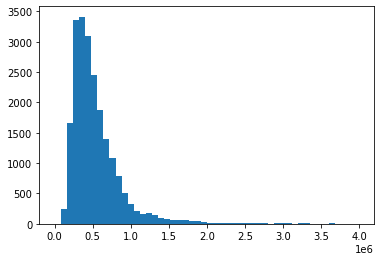

In [99]:
#Observando algumas distribuições
plt.hist(x = base['price'], bins=50, range=(0, 4e6));

In [100]:
#Removendo os outliers de price
#Apagando os registros fora do limite de u+2*std ou u-2*std
price_mean = 5.400881e+05
price_std = 3.671272e+05
sup_lim = price_mean+2*price_std
inf_lim = price_mean-2*price_std

dfw = base[base['price'] < sup_lim]
dfw = dfw[dfw['price'] > inf_lim]
base = dfw


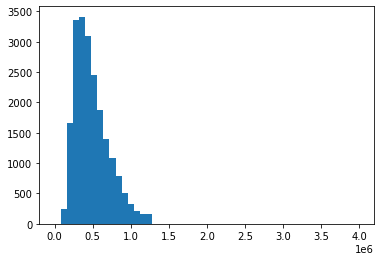

In [101]:
#Observando o corte
plt.hist(x = base['price'], bins=50, range=(0, 4e6));

In [102]:
#Cast e arredondamentos
from math import ceil

bathroom_col_index = base.columns.get_loc("bathrooms")
floors_col_index = base.columns.get_loc("floors")

for i in range(0, len(base)):
    base.iloc[i, bathroom_col_index] = ceil(base.iloc[i, bathroom_col_index])  #Arredonda para cima
    base.iloc[i, floors_col_index] = ceil(base.iloc[i, floors_col_index])

#Cast para inteiro
base['bathrooms'] = base['bathrooms'].astype('int')
base['floors'] = base['floors'].astype('int')

### Preparação para entrada no modelo

In [103]:
import numpy as np

In [104]:
#SLIPT
#Feature selection e definição da variável de predição
df_X = base.iloc[:, 3:19]
df_y = base.iloc[:, 2:3]
print("\nAtributos ou variáveis de entrada:")
print(df_X.head())
print("\nVariável de predição:")
print(df_y.head())


Atributos ou variáveis de entrada:
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
1         3          3         2570      7242       2           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  
0    98178  47.5112 -122.257  
1    9

In [105]:
#Remoção de atributos na base de dados para simplificação
# <dataframe>.drop(labels="<colum name>", axis='columns')
df_X.drop(columns = ["lat", "long", "waterfront", "view", "sqft_basement", "yr_renovated", "sqft_lot", "grade", "zipcode"], inplace = True)
print(df_X.info())
df_X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20755 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bedrooms     20755 non-null  int64
 1   bathrooms    20755 non-null  int64
 2   sqft_living  20755 non-null  int64
 3   floors       20755 non-null  int64
 4   condition    20755 non-null  int64
 5   sqft_above   20755 non-null  int64
 6   yr_built     20755 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB
None


,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,yr_built
0,3,1,1180,1,3,1180,1955
1,3,3,2570,2,3,2170,1951
2,2,1,770,1,3,770,1933
3,4,3,1960,1,5,1050,1965
4,3,2,1680,1,3,1680,1987


In [106]:
#Transformação para array
Xnp = df_X.iloc[:, :].values
ynp = df_y.iloc[:, :].values

print(Xnp[:5])
print(ynp[:5])

[[   3    1 1180    1    3 1180 1955]
 [   3    3 2570    2    3 2170 1951]
 [   2    1  770    1    3  770 1933]
 [   4    3 1960    1    5 1050 1965]
 [   3    2 1680    1    3 1680 1987]]
[[221900.]
 [538000.]
 [180000.]
 [604000.]
 [510000.]]


In [107]:
#Normalização dos dados
from sklearn.preprocessing import normalize, MinMaxScaler

#Using MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(Xnp)
y_scaled = y_scaler.fit_transform(ynp)

#Retorna as 5 primriras linhas
print(X_scaled[:5]) 
print("\n")
print(y_scaled[:5])

[[0.0625     0.         0.11392405 0.         0.5        0.11654676
  0.47826087]
 [0.0625     0.28571429 0.30942335 0.33333333 0.5        0.25899281
  0.44347826]
 [0.03125    0.         0.05625879 0.         0.5        0.05755396
  0.28695652]
 [0.09375    0.28571429 0.22362869 0.         1.         0.09784173
  0.56521739]
 [0.0625     0.14285714 0.18424754 0.         0.5        0.18848921
  0.75652174]]


[[0.12046882]
 [0.38509837]
 [0.08539138]
 [0.44035161]
 [0.3616576 ]]


In [108]:
#Observando alguns valores limites
print(X_scaled[:,1].min())
print(X_scaled[:,1].max())
print(y_scaled.min())
print(y_scaled.max())

0.0
1.0
0.0
0.9999999999999999


In [109]:
#Observando os shapes
print(X_scaled.shape)
print(y_scaled.shape)

(20755, 7)
(20755, 1)


In [110]:
#Exportando como CSV o databese preprocessado

# Previsores
#X_export = pd.DataFrame(X_scaled)
#X_export.to_csv("./tensor_houseprice_preprocessed_input.csv", index=False)

# Classe alvo
#y_export = pd.DataFrame(y_scaled)
#y_export.to_csv("./tensor_houseprice_preprocessed_target.csv", index=False)


In [111]:
#Divisão de base de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
                    X_scaled, y_scaled, 
                    test_size = 0.25, 
                    random_state = 0
                    )

In [112]:
#Observando os primeiros valores
print(X_treinamento[:2,:])

[[0.09375    0.28571429 0.41068917 0.33333333 0.5        0.42014388
  0.89565217]
 [0.0625     0.28571429 0.25316456 0.         0.5        0.18992806
  0.69565217]]


In [113]:
print(X_teste[:2,:])

[[0.0625     0.28571429 0.30942335 0.66666667 0.5        0.31654676
  0.93043478]
 [0.09375    0.28571429 0.30520394 0.         0.5        0.31223022
  0.73043478]]


In [114]:
print(y_treinamento[:2,:])

[[0.54416074]
 [0.1373378 ]]


In [115]:
print(y_teste[:2,:])

[[0.50397656]
 [0.58350774]]


### Criando o modelo neural

In [116]:
# Bibliotecas do Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [117]:
#Definição do modelo
model = Sequential([
        keras.layers.Input(shape=X_treinamento.shape[1:]),  #Definição da camada de entrada, nesse caso são 7 atributos
        keras.layers.Dense(9, activation='relu'),    #Número de neurônios da primeira camada oculta e função de ativação
        keras.layers.Dense(9, activation='relu'),    #Adicionando uma segunda camada oculta
        keras.layers.Dropout(0.2),  #O dropout ajuda a previnir overfiting, a taxa varia entre 0 a 1 com valores usuais pequenos
        keras.layers.Dense(1, activation='sigmoid')  #Camada de saída de regressão
    ])

In [118]:
# Dimensão da camada de entrada, retorna o shape do primeiro registro de variáveis de entrada
X_treinamento.shape[1:]

(7,)

In [119]:
#Resumo do modelo criado
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 10        
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [120]:
#Compilando o modelo
from tensorflow.keras import optimizers

model.compile(
#              optimizer='adam',                                 #Adam para o backpropagation
#              optimizer=optimizers.RMSprop(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
              optimizer=optimizers.SGD(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
              loss=keras.losses.mse,       #Função de perda
#              loss='bce',
              metrics=['mae', 'mse']                               #Métrica utilizada
             )

In [121]:
#Treinamento do modelo
history = model.fit(X_treinamento, y_treinamento, epochs=100, validation_data=(X_teste, y_teste), verbose=0)

In [122]:
#Checando a acurácia
model.evaluate(X_teste, y_teste)

163/163 [==============================] - 0s 2ms/step - loss: 0.0321 - mae: 0.1430 - mse: 0.0321


[0.03207800164818764, 0.14302535355091095, 0.03207800164818764]

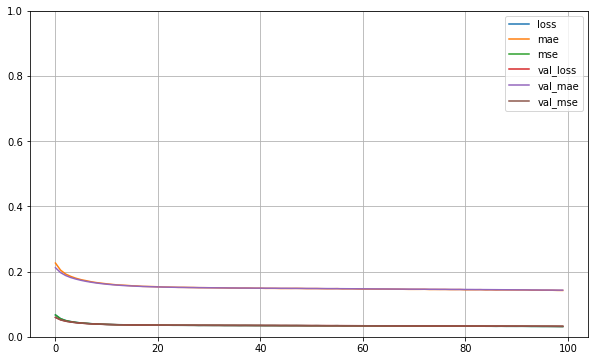

In [123]:
#Evolução de performance
pd.DataFrame(history.history).plot(figsize=(10,6))  #Evolução das métricas
plt.grid(True)            #Mostra as linhas de grade
plt.gca().set_ylim(0, 1)  #Limites do eixo y
plt.show()                #Gera o gráfico

### Realizando uma predição

In [124]:
#Predição de 1 registro da base de teste
X_predict = np.array(X_teste[100])   #Registro selecionado
y_correct_predict = y_teste[100]     #Valor correto

X_predict_list = list()            #Ajuste de dimensões (transposição)
for i in X_predict:
    X_predict_list.append([i])
X_predict_transpose = np.array(X_predict_list).T
print(X_predict_transpose.shape)

y_predict = model.predict(X_predict_transpose)   #Predição

print(y_predict)
print(y_correct_predict)

(1, 7)
[[0.341767]]
[0.19003767]


In [125]:
#Predição de um valor inserido pelo usuário
X = [[0.15, 0.32, 0.23, 0, 0.60, 0.33, 0.45]]
print(np.array(X).shape)
y = model.predict(X)   #Predição por entrada direta
print(y)
y_noscaled = y_scaler.inverse_transform(y)
print(y_noscaled)      #Transformando para o valor original da variável


(1, 7)
[[0.32945454]]
[[471533.47]]
